# Perceptron Lab





This is the scaffold code for the perceptron lab and each lab will have a similar scaffold. There are both code boxes and discussion boxes that you will need to fill in as part of the lab. For example, the first code box you will fill is found below in section one. It a PerceptronClassifier class with function stubs. In addition to filling out the stubs, you are encouraged to add additional functions, parameters, etc. as you see fit.  You do not need to use the scaffolding, but your learners must minimally support the functions and parameters defined in the scaffolding.

**You should have some discussion for all subtasks** and particularly discussion of results, graphs, etc. Good writing, grammar, punctuation, etc. are important and points will be taken off if these things are lacking. Label all axes on graphs. The report for each subtask might go something like:
In this task I divided the randomly shuffled training set into a training set (70%) and a test set (30%). I tried different values of parameter x from n-m and reported training and test set accuracy in the table.  I kept testing until m because… The accuracy on the training set was highest for values between 2-4 while for the test set the accuracy was highest for values 5 and 6. In most casees just reporting results without discussion will not receive full credit. Thus, your discussion should also include sentences like the following: This is because…  Note that the …  I was surprised to observe… I am not sure why …, but my hypothesis is that …

In [ ]:
# imports
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.linear_model import Perceptron
import numpy as np
import matplotlib.pyplot as plt

## 1. Correctly implement and submit your own code for the perceptron learning algorithm. 

### Code requirements
- Shuffle the data each epoch.
- Implement a way to create a random train/test split. Write your own. In the future you can use the scikit-learn version if you want. 
- Use Stochastic/On-line training updates: Iterate and update weights after each training instance (i.e. not batch updates)
- Implement a stopping criteria: when your model has trained for a number of epochs with no improvement in accuracy, stop training. Note that the weights/accuracy do not usually change monotonically.
- Your class can inherit from the relevant scikit-learn learners, but don't call any of the super methods to accomplish the requirements above.
- You may use other packages for ARFF loading, graphing, generating a random number, etc.

In [ ]:
from sklearn.utils import shuffle
class PerceptronClassifier(BaseEstimator,ClassifierMixin):

    def __init__(self, lr=.1, shuffle=False, num_epochs=0, split=False):
        """ 
            Initialize class with chosen hyperparameters.
        Args:
            lr (float): A learning rate / step size.
            shuffle: Whether to shuffle the training data each epoch. DO NOT 
            SHUFFLE for evaluation / debug datasets.
        """
        self.lr = lr
        self.shuffle = shuffle
        self.num_epochs = num_epochs
        self.split = split

    def fit(self, X, y, initial_weights=None):
        """ 
            Fit the data; run the algorithm and adjust the weights to find a 
            good solution
        Args:
            X (array-like): A 2D numpy array with the training data, excluding
            targets
            y (array-like): A 2D numpy array with the training targets
            initial_weights (array-like): allows the user to provide initial 
            weights
        Returns:
            self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)
        """
        # if shuffle is set, randomly shuffle and split the data into 70/30 train test sets
        if self.split:
          X,y = self._shuffle_data(X, y)

          X_split = np.vsplit(X, [len(X) * 7//10])
          y_split = np.vsplit(y, [len(y) * 7//10])
          X_train = X_split[0]
          X_test = X_split[1]
          y_train = y_split[0]
          y_test = y_split[1]

          self.X_test = X_test
          self.y_test = y_test
          self.X_train = X_train
          self.y_train = y_train
        # train on all the data if shuffle is false
        else:
          X_train = X
          y_train = y

        row, col = X_train.shape
        self.weights = self.initialize_weights(col) if not initial_weights else initial_weights
        # if a num_epochs is given, run for the given numer
        if self.num_epochs > 0:
          for epoch in range(self.num_epochs):
            for cntr in range(len(X_train)):
              array_with_bias = np.append(X_train[cntr], 1)
              net = np.dot(array_with_bias, self.weights)
              if net > 0:
                output = 1
              else:
                output = 0
              change_weight = np.zeros_like(self.weights)
              tmp = 0
              for x in array_with_bias:
                change_weight[tmp] = (self.lr * (y_train[cntr] - output) * x)
                tmp += 1
              self.weights = np.add(self.weights, change_weight)
            if self.shuffle:
              self._shuffle_data(X_train,y_train)
        # if no given num_epochs, run until stopping criteria is reached
        else:
          curr_score = 0
          last_score = 0
          should_run = True
          while should_run:
            self.num_epochs += 1
            for cntr in range(len(X_train)):
              array_with_bias = np.append(X_train[cntr], 1)
              net = np.dot(array_with_bias, self.weights)
              if net > 0:
                output = 1
              else:
                output = 0
              change_weight = np.zeros_like(self.weights)
              tmp = 0
              for x in array_with_bias:
                change_weight[tmp] = (self.lr * (y_train[cntr] - output) * x)
                tmp += 1
              self.weights = np.add(self.weights, change_weight)
            last_score = curr_score
            curr_score =  1 - self.score(X,y)
            # stopping criteria
            if(curr_score > (last_score - 1e-5) and self.num_epochs > 1):
              should_run = False
            # if shuffle is true, shuffle the data after each epoch
            if self.shuffle:
              self._shuffle_data(X_train,y_train)
        return self

    def predict(self, X):
        """ 
            Predict all classes for a dataset X
        Args:
            X (array-like): A 2D numpy array with the training data, excluding 
            targets
        Returns:
            array, shape (n_samples,)
                Predicted target values per element in X.
        """
        predicted_targets = []
        for index in range(len(X)):
          array_with_bias = np.append(X[index],1)
          net = np.dot(array_with_bias, self.weights)
          if net > 0:
            predicted_targets.append(1)
          else:
            predicted_targets.append(0)
        return predicted_targets

    def initialize_weights(self, dim):
        """ Initialize weights for perceptron. Don't forget the bias!
        Returns:
        """
        # add one for bias weight
        return np.zeros([dim + 1])

    def score(self, X, y):
        """ 
            Return accuracy of model on a given dataset. Must implement own 
            score function.
        Args:
            X (array-like): A 2D numpy array with data, excluding targets
            y (array-like): A 2D numpy array with targets
        Returns:
            score : float
                Mean accuracy of self.predict(X) wrt. y.
        """
        predicted_targets = self.predict(X)
        SSE = 0
        for index in range(len(predicted_targets)):
          SSE += np.square(y[index][0] - predicted_targets[index])
        MSE = np.divide(SSE,len(predicted_targets))
        # report accuracy score as 1-MSE 
        return 1 - MSE

    def _shuffle_data(self, X, y):
        """ 
            Shuffle the data! This _ prefix suggests that this method should 
            only be called internally.
            It might be easier to concatenate X & y and shuffle a single 2D 
            array, rather than shuffling X and y exactly the same way, 
            independently.
        """
        cat = np.concatenate((X, np.reshape(y.T, (-1, 1))), axis=1)
        np.random.shuffle(cat)
        cat = np.hsplit(cat, [len(cat[0]) -1])
        X = cat[0]
        y = cat[1]
        return X,y

    ### Not required by sk-learn but required by us for grading. Returns the weights.
    def get_weights(self):
        return self.weights

    def get_num_epochs(self):
        # for reporting later in lab
        return self.num_epochs

## 1.1 Debug and Evaluation

Use your perceptron code first to solve the Debug data. We provide you with several parameters, and you should be able to replicate our results every time. When you are confident your code is correct, run your perceptron on the Evaluation data with the same parameters.

Debug and Evaluate your model using the parameters below

Learning Rate = 0.1 \ 
Deterministic = 10 [This means run it 10 epochs and should be the same everytime you run it] \ 
Shuffle = False \ 
Initial Weights = All zeros

---

### 1.1.1 (20%) Debug

Debug your model by running it on the [debug dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/linsep2nonorigin.arff)

Expected Results:

Accuracy = [0.88]\
Final Weights = [-0.23  0.18 -0.1 ]

In [ ]:
from scipy.io import arff
import pandas as pd

# !curl https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/linsep2nonorigin.arff --output linsep2nonorigin.arff

test_data_unclean = arff.loadarff('linsep2nonorigin.arff')
test_data_from_scipy = pd.DataFrame(test_data_unclean[0])
linsep_np_data = test_data_from_scipy.to_numpy()
linsep_np_data = linsep_np_data.astype(float)

test_data_split= np.hsplit(linsep_np_data, [2])
X = test_data_split[0]
y = test_data_split[1]

# Train on debug data

pc = PerceptronClassifier(num_epochs=10)
pc.fit(X,y)



# Have your code print your accuracy and weights

print(pc.get_weights())
print(pc.score(X,y))

[-0.23  0.18 -0.1 ]
0.875


I used my perceptron to debug with the sample dataset. When I did that, I was able to reproduce the weights perfectly, and the accuracy rounded to the same number. So I set my model to only randomly split 70/30 when the split hyperparameter was set to true. My perceptron model utilizes MSE to report the loss, so I reproted the accuracy as 1- MSE and it came to .875, which rounds to .88, the given score. In the case of the Perceptron, MSE is the same as the average missclassfication rate, because perceptron outputs either a one or zero, and squared, 1 and zero remain the same. So alternitively to calculate the error we could just use the number correctly classified/ the total number of items, which in this case comes to 7/8 which is equal to .875.

### 1.1.2 (20%) Evaluation

We will evaluate your model based on it's performance on the [evaluation dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/data_banknote_authentication.arff). Use the same parameters as the debug dataset

In [ ]:
from scipy.io import arff
import pandas as pd

# !curl https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/data_banknote_authentication.arff --output data_banknote_authentication.arff

test_data_unclean = arff.loadarff('data_banknote_authentication.arff')
test_data_from_scipy = pd.DataFrame(test_data_unclean[0])
data_banknote_authentication = test_data_from_scipy.to_numpy()
data_banknote_authentication = data_banknote_authentication.astype(float)

test_data_split= np.hsplit(data_banknote_authentication, [4])
X = test_data_split[0]
y = test_data_split[1]

pc = PerceptronClassifier(num_epochs=10)
pc.fit(X,y)

print(pc.get_weights())
print(pc.score(X,y))

[-3.80657242 -2.840821   -3.0719334  -1.4003906   4.9       ]
0.9876093294460642


Considering the problem I had with splitting the debug data, I chose to test and train on this whole set as well so the output would be deterministic. If I slpit the data, my random 70/30 split could potentially affect the output. After training on the whole dataset, I tested against it and using MSE got an accuracy score of almost .99 so the model performed very well. Of course, If ran against a unique test set I expected that to come down. For practice's sake I ran with shuffle and split set to true, so the set would shuffle after each epoch and also split 70/30 on the dataset randomly. When I did that the accuracy came down a little but was still on average close to .90. Judging by the given weights, the X1 and X3 weights seem to be the best indicators as the absolute value of those weights are the largest and therfore would be the strongest factors, but the other features had some significant impact as well. 

## 2. Classifying on linearly separable and non-linearly separable data

### 2.1 (5%) Create 2 datasets

- Both with 8 instances using 2 real valued inputs (ranging between -1 and 1) with 4 instances from each class. 
- One data set should be linearly separable and the other not.



In [ ]:
# Create 2 datasets
linear = np.array([[.5, .6], [.4, .3],[.2,.1],[.3,.5], [-.6,-.5], [-.4, -.6],[-.7,-.6],[-.8,-.8]])
linear_targets = np.array([0,0,0,0,1,1,1,1])
non_linear = np.array([[.5, -.1], [-.2, .9], [.1, -.5], [.2, -.9],[.2,.5],[-.3,-.3],[.4,.4],[-.6,.6]])
non_linear_targets = np.array([1,0,0,1,0,1,0,1])

I created the datsets as expected. My linear set is clearly linearly separable with 4 instances of the same class. non_linear follows the same constraints

### 2.2 (5%) Train on both sets with your perceptron code (with LR=.1)

In [ ]:
pc_linear = PerceptronClassifier(split=True)
pc_non_linear = PerceptronClassifier(split=True)

pc_linear.fit(linear, linear_targets)
pc_non_linear.fit(non_linear, non_linear_targets)

print(pc_linear.get_weights())
print(pc_non_linear.get_weights())

[-0.12 -0.11  0.  ]
[-0.07 -0.1   0.  ]


Output shows the final weights plus bias after training with my perceptron model. I took those weights and used them to plot the line to separate data with the function X2 = (-W1/W2) + (-B/W2)

### 2.3 (5%) Graph the datasets and their corresponding decision line
 
 - Graph each dataset
 - Use your trained perceptrons above to determine each dataset's decision line
 - For all graphs always label the axes!
 
![Linearly Separable Data](https://raw.githubusercontent.com/rmorain/CS472-1/master/images/perceptron/linearly_separable.png)

![Not Linearly Separable](https://raw.githubusercontent.com/rmorain/CS472-1/master/images/perceptron/not_linearly_separable.png)

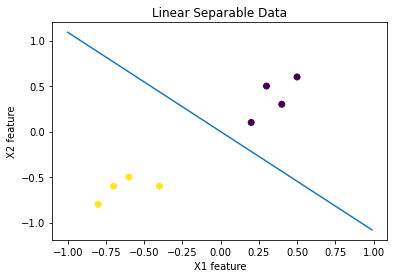

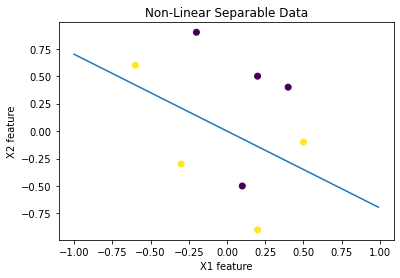

In [ ]:
# Graph datasets and decision lines
import matplotlib.pyplot as plt

linear_split = np.hsplit(linear, 2)
X = linear_split[0]
y = linear_split[1]
label = linear_targets
color = ['blue', 'orange']

plt.title('Linear Separable Data')
plt.xlabel('X1 feature')
plt.ylabel('X2 feature')
plt.scatter(X,y, c=label)

X1 = np.arange(start = -1, stop = 1, step = 0.01)
X2 = (.12/-.11)*X1 + (0/-.11)
plt.plot(X1, X2)
plt.show()


non_linear_split = np.hsplit(non_linear, 2)
X = non_linear_split[0]
y = non_linear_split[1]
label = non_linear_targets

plt.title('Non-Linear Separable Data')
plt.xlabel('X1 feature')
plt.ylabel('X2 feature')
plt.scatter(X,y, c=label)

X1 = np.arange(start = -1, stop = 1, step = 0.01)
X2 = (.07/-.1)*X1 + (0/-.13)
plt.plot(X1, X2)
plt.show()

*Discussion*

### 2.4 (5%) Discuss why the perceptron won’t converge on non-linearly separable data.

Perceptron cannot converege on non-linearly separable data because of the limited functionality of a hyperplane. Because it only takes in linear inputs, the model can only classify based on a linear hyperplane, which prevents it from being able separate data that is shaped differently. It won't converege because it will clasify and separate, but then always have misclassified data and so it will continue to try and adjust the weights- but as long as it has those linear constraints it will not be successful.

## 3. Use your perceptron code to learn this version of the [voting data set](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/voting-dataset.arff).

This particular task is an edited version of the standard voting set, where we have replaced all the “don’t know” values with the most common value for the particular attribute.  

### 3.1 (10%) Create a table that reports the final training and test set accuracy and the number of epochs for each trial.

- Try it five times with different random 70/30 splits. 
- Use your own code to randomize and make splits. 
- Report the 5 trials and the average across the 5 trials in a table (below is an example of what a smaller table might look like).  

| Trial | Training Accuracy | Test accuracy | Number of epochs |
| --- | --- | --- | --- |
| 1 | .95 | .55 | 4 |
| 2 | .85 | .45 | 6 |
| Average | .9 | .5 | 5 | 

*- As a rough sanity check, typical Perceptron test accuracies for the voting data set are 90%-98%.*


In [ ]:
# Create the table any way you like
from scipy.io import arff
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# !curl https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/voting-dataset.arff --output voting-dataset.arff

test_data_unclean = arff.loadarff('voting-dataset.arff')
test_data_from_scipy = pd.DataFrame(test_data_unclean[0])
voting_label_encoded_df = test_data_from_scipy.apply(LabelEncoder().fit_transform)
voting_dataset = voting_label_encoded_df.to_numpy()

test_data_split= np.hsplit(voting_dataset, [16])
X = test_data_split[0]
y = test_data_split[1]

pc = PerceptronClassifier(shuffle=True, split=True)
pc.fit(X,y)

print(pc.score(pc.X_train, pc.y_train))
print(pc.score(pc.X_test, pc.y_test))
print(pc.get_num_epochs())
print(pc.get_weights())


0.9409937888198758
0.9136690647482014
3
[-2.00000000e-01  0.00000000e+00 -5.00000000e-01  1.00000000e+00
 -1.00000000e-01 -2.00000000e-01  2.00000000e-01  3.00000000e-01
 -2.77555756e-17  3.00000000e-01 -4.00000000e-01  2.00000000e-01
  1.00000000e-01 -2.00000000e-01 -7.00000000e-01  1.00000000e-01
 -5.00000000e-01]


In [ ]:
from tabulate import tabulate
headers = ["Trial", "Training Accuracy", "Test Accuracy", "Number of Epochs"]
table = [["1",.93168,.91367,5],["2", .95342,.91367,6],
          ["3",.94099,.91366,7],["4",.97515,.93525,8],["5",.96894,.96402,9],
         ["Average", .95901, .93028, 7]]
print(tabulate(table, headers=headers))

Trial      Training Accuracy    Test Accuracy    Number of Epochs
-------  -------------------  ---------------  ------------------
1                    0.93168          0.91367                   5
2                    0.95342          0.91367                   6
3                    0.94099          0.91366                   7
4                    0.97515          0.93525                   8
5                    0.96894          0.96402                   9
Average              0.95901          0.93028                   7


On the voting dataset I set the model to split and shuffle, and also did not require it to run for a certain number of epochs, instead letting it run until it reached my stopping criteria, which was to take the newest calulated score and compare it to the last score minus a given threshold (used 1-e5 for this test). The model proved very accurate, ranging from 93-98% accuracy

### 3.2 (5%) By looking at the weights, do your best to explain what the model has learned and how the individual input features affect the result. Which specific features are most critical for the voting task, and which are least critical? 


Based on the weights, looks like the X4 input is the most critical for the voting task, while the X11 features are the least critical.

### 3.3 (5%) Make a graph of the average misclassification rate vs epochs (0th – final epoch).

- Average the misclassification rate for the training set across your 5 trials (not across 5 epochs): mean(number misclassified  /  number of total data points) vs epoch
- For larger number epochs, only include in the average those runs that trained for at least that length


![Average Misclassification Rate](https://raw.githubusercontent.com/rmorain/CS472-1/master/images/perceptron/avg_misclassification_rate_vs_epochs.png)

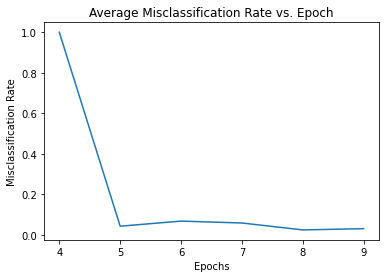

In [ ]:
# Graph here
    
def plot_misclassification(avg_misclassification_rate, num_epochs):
    """
        Plots the average misclassification rate
    Args:
        avg_misclassification_rate (array-like): A 1D array or list
    """
    # plt.plot(np.arange(len(avg_misclassification_rate)), avg_misclassification_rate)
    plt.plot(num_epochs, avg_misclassification_rate)
    plt.title("Average Misclassification Rate vs. Epoch")
    plt.xlabel("Epochs")
    plt.ylabel("Misclassification Rate")
    plt.show()

plot_misclassification([1, 1-.95684,1- 0.93168 ,1-0.94099,1- 0.97515,1- 0.96894], [4,5,6,7,8,9])
    


My trials all had a pretty good classification rate, whether it ran for 5 epochs or 9, but you can see there more epochs are ran, the loss decreases ever so slightly. For kicks and giggles I ran it for 10 epochs because with my stoppping criteria I could never get the model to do so. 10 Epcohs was even slightly more accurate, supporting this trendline

## 4.1 (10%) Use the perceptron algorithm from the [scikit-learn toolkit](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html) to learn the voting task above.
- Report and compare your results with your own perceptron code.
- Try out some of the hyper-parameters that scikit-learn makes available for the perceptron and discuss your findings. Record your impressions of how scikit-learn works.

In [ ]:
from sklearn.linear_model import Perceptron

clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X, y)
Perceptron()
clf.score(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9609544468546638

With Skilearn perceptron, the accuracy was about .96 which is right in line with my Perceptron model, which averaged about a .959 accuracy score. Because the perceptron is sucha simple model, I would imagine that our scores should have been relatively close. I also used a stopping criteria that was similar to sklearn which also helps explain the similarity. They weren't exactly the same however, and when I checked my sklearn perceptron ran for 9 epochs which was several more than the 3 my model averaged so I would expect it to be slightly more accurate, even if the random shuffling might favor one or the other.

## 4.2 (10%) Use the perceptron algorithm from the [scikit-learn toolkit](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html) to learn one other data set of your choice.  
- The UC Irvine Data Repository is a great source, but you may get your data set from wherever you like, though it should represent a real world task.
- Try out some of the hyper-parameters that scikit-learn makes available.

In [ ]:
from sklearn.datasets import load_wine
X, y = load_wine(return_X_y=True)
clf = Perceptron(tol=1e-5, random_state=0, early_stopping=True)
clf.fit(X, y)
Perceptron()
clf.score(X, y)

0.5112359550561798

I used the wine dataset from sklearn, which is the result of a chemical analysis of wines grown in the same region in Italy by three different cultivators. There are thirteen different measurements taken for the Wine. I found that depending on the hyperparameters, my score would change. The last choice I made was including earl_stopping, wich is a parameter that stops training early when the score is not improving. That really wweakened the accuracy of my model, dropping the score from the upper .80s to only about .51 as seen. Stopping early isn't always a good idea obviously. The scores don't always increase linearlly and so stopping early if you aren't careful can cause a low score like it did for me. 

## 5. (Optional 5% extra credit) Use the perceptron rule to learn the [iris task](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/iris.arff) or some other task with more than two possible output values. 

Note that the [iris data](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/iris.arff) set has 3 output classes, and a perceptron node only has two possible outputs.  You could implement an approach to deal with this like we discussed in class (review in slides). For testing you just execute the novel instance on each model and report the results. You could break ties using net values but that is not required for this part.

In [ ]:
# Code here

*Discussion*